# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [3]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Yr/Seas,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Tenzing Norgay,1953 Spr,29-May,11:30,India,M,39,Y,.,Nepal
1,EVER,Edmund Percival Hillary,1953 Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
2,EVER,Juerg P. Marmet,1956 Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
3,EVER,Ernst Schmied,1956 Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal
4,EVER,Adolf (Dolf) Reist,1956 Spr,24-May,11:00,Switzerland,M,35,Y,.,Nepal


In [31]:
df.describe()

,Age
count,10184.000000
mean,34.690888
std,10.304911
min,0.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,80.000000


In [39]:
season = []
yearseason = list(df.iloc[:,2])
for i in yearseason:
    j = i[5:8]
    season.append(j)
season

['Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Aut',
 'Aut',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Spr',
 'Spr',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Win',
 'Win',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Sum',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Aut',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',
 'Spr',


In [11]:
ages = list(df.iloc[:,7])
ages

[39,
 33,
 28,
 31,
 35,
 27,
 25,
 25,
 24,
 26,
 34,
 31,
 26,
 32,
 36,
 28,
 27,
 42,
 23,
 0,
 30,
 27,
 30,
 27,
 36,
 29,
 35,
 37,
 21,
 26,
 32,
 17,
 27,
 41,
 30,
 29,
 28,
 24,
 25,
 35,
 30,
 27,
 36,
 18,
 36,
 22,
 28,
 0,
 35,
 33,
 34,
 24,
 27,
 30,
 30,
 28,
 30,
 28,
 28,
 36,
 33,
 24,
 27,
 35,
 33,
 31,
 35,
 29,
 28,
 34,
 34,
 25,
 31,
 46,
 49,
 28,
 37,
 37,
 35,
 29,
 0,
 0,
 24,
 31,
 22,
 27,
 38,
 28,
 28,
 50,
 30,
 31,
 38,
 38,
 27,
 31,
 48,
 46,
 39,
 21,
 22,
 24,
 28,
 30,
 31,
 32,
 27,
 29,
 30,
 31,
 32,
 35,
 33,
 26,
 32,
 28,
 33,
 32,
 44,
 35,
 29,
 38,
 40,
 30,
 29,
 38,
 40,
 33,
 27,
 27,
 32,
 29,
 26,
 24,
 33,
 27,
 27,
 39,
 34,
 35,
 37,
 25,
 37,
 28,
 27,
 41,
 26,
 35,
 30,
 31,
 33,
 39,
 35,
 41,
 31,
 33,
 28,
 31,
 41,
 36,
 36,
 25,
 25,
 34,
 29,
 35,
 39,
 40,
 28,
 31,
 29,
 50,
 36,
 33,
 50,
 40,
 33,
 27,
 26,
 37,
 34,
 47,
 47,
 29,
 36,
 35,
 26,
 30,
 55,
 29,
 23,
 32,
 26,
 25,
 35,
 29,
 27,
 47,
 29,
 30,
 28,

(array([ 174.,    4.,  868., 2972., 3100., 2000.,  793.,  232.,   36.,
           5.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

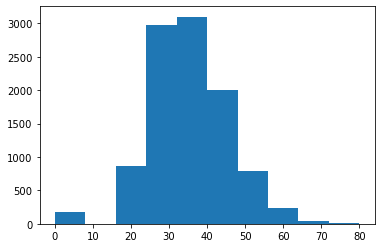

In [12]:
plt.hist(ages)

(array([ 1.,  0.,  6., 26., 44., 48., 40., 25.,  8.,  2.]),
 array([-3.93051897,  3.05997575, 10.05047047, 17.04096519, 24.03145992,
        31.02195464, 38.01244936, 45.00294408, 51.9934388 , 58.98393353,
        65.97442825]),
 <BarContainer object of 10 artists>)

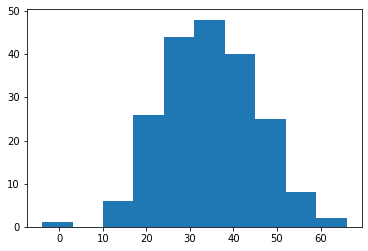

In [44]:
rng = np.random.default_rng()
vals = rng.normal(loc=34.69, scale=10.30, size=200)
plt.hist(vals)

In [30]:
oxygen = list(df.iloc[:, 8])
sex = list(df.iloc[:, 6])
time = list(df.iloc[:, 4])
time

['11:30',
 '11:30',
 '14:00',
 '14:00',
 '11:00',
 '11:00',
 '02:05',
 '02:05',
 '02:05',
 '13:00',
 '13:00',
 '15:30',
 '15:30',
 '18:30',
 '18:30',
 '09:30',
 '09:30',
 '12:30',
 '12:30',
 '10:45',
 '10:45',
 '10:00',
 '10:00',
 '10:00',
 '09:10',
 '09:10',
 '09:55',
 '09:55',
 '12:39',
 '12:39',
 '12:39',
 '12:39',
 '13:00',
 '13:00',
 '13:00',
 '13:00',
 '16:30',
 '16:30',
 '12:30',
 '12:30',
 '12:15',
 '12:15',
 '12:15',
 '12:15',
 '12:15',
 '12:15',
 '12:15',
 '12:15',
 '12:30',
 '18:00',
 '18:00',
 '13:10',
 '13:10',
 '15:15',
 '15:15',
 '16:14',
 '16:14',
 '12:50',
 '12:50',
 '12:50',
 '12:50',
 '12:50',
 '12:50',
 '13:15',
 '13:15',
 nan,
 nan,
 nan,
 '16:30',
 '17:00',
 '17:15',
 '13:35',
 '13:35',
 '13:45',
 '13:45',
 '13:45',
 '13:45',
 '13:45',
 '13:45',
 '13:45',
 '13:45',
 '13:45',
 nan,
 nan,
 '13:51',
 '13:51',
 '14:30',
 '14:30',
 '14:30',
 '14:00',
 '14:00',
 '14:00',
 '14:00',
 '14:00',
 '13:00',
 '13:00',
 '13:00',
 '13:00',
 '13:00',
 '13:00',
 '13:00',
 '13:00',
